In [33]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math

In [34]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [35]:
#Construction of necessary elements of theta and phi Hilbert spaces

# For phi

N=50
a_phi=np.diag(np.sqrt(np.arange(1, N+1)), 1)
ad_phi=np.diag(np.sqrt(np.arange(1, N+1)), -1)
N_phi=ad_phi@a_phi
Id_N=np.eye(N+1)

# For theta

M=20
Id_M=np.eye(2*M+1)
n_theta=np.flipud(np.fliplr(np.diag(np.arange(-M,M+1), 0)))

#Values of equilibrium

phi_ext_val=np.pi
ng_val=0.5

#Qubit parameters 1 

E_Cs=1.0
E_Cj=1.0
E_L=1.0
E_J=1.0
alpha=(1j*(E_Cj/E_L)**(1.0/4.0))

# Qubit parameters 2

E_Cs_2=(1.0/20)
E_Cj_2=1.0
E_L_2=(1.0/16)
E_J_2=(1.0/5.0)
alpha2=(1j*(E_Cj_2/E_L_2)**(1.0/4.0))



In [205]:
#1ST VALUES

#OJOOOO SE CAMBIA CON CADA SET OF VALUES
epsilon_n=0.01*0.5
epsilon_phi=(0.022776*np.pi)

#T=200*1/0.083
T=5.5*1/0.00195092
print(T)
#N_time=10000
N_time=30
Delta_t=T/N_time
print(Delta_t)
time_array=np.linspace(Delta_t,T,N_time)
print(time_array)

2819.1827445512886
93.97275815170961
[  93.97275815  187.9455163   281.91827446  375.89103261  469.86379076
  563.83654891  657.80930706  751.78206521  845.75482337  939.72758152
 1033.70033967 1127.67309782 1221.64585597 1315.61861412 1409.59137228
 1503.56413043 1597.53688858 1691.50964673 1785.48240488 1879.45516303
 1973.42792119 2067.40067934 2161.37343749 2255.34619564 2349.31895379
 2443.29171194 2537.2644701  2631.23722825 2725.2099864  2819.18274455]


In [37]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_ng(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #print("H =>",len(H))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n-epsilon_n*np.cos(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    #print("H_theta =>",len(H_theta))
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    #print("H_phi =>",len(H_phi))
    H_0=H_theta+H_phi
    #print("H_0 =>",len(H_0))
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi-epsilon_phi*np.sin(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #print("H_I =>",len(H_I))
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    #print("H =>",len(H))
    H+=H_0-H_I
    #print("H =>",len(H))
    return H

In [38]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_phiext(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n-epsilon_n*np.sin(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi-epsilon_phi*np.cos(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I
    return H

In [39]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_ng_backwards(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #print("H =>",len(H))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n+epsilon_n*np.cos(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    #print("H_theta =>",len(H_theta))
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    #print("H_phi =>",len(H_phi))
    H_0=H_theta+H_phi
    #print("H_0 =>",len(H_0))
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi+epsilon_phi*np.sin(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #print("H_I =>",len(H_I))
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    #print("H =>",len(H))
    H+=H_0-H_I
    #print("H =>",len(H))
    return H

In [40]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_phiext_backwards(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n+epsilon_n*np.sin(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi+epsilon_phi*np.cos(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I
    return H

In [41]:
def U_t(Hamiltonian,time):
    return scipy.linalg.expm(-1j*Hamiltonian*time)

In [42]:
def calculate_overlap(vect1,vect2):
    return np.abs(np.conj(vect1)@vect2)**2

In [204]:
#THESE ARE LOAD FOR M=20,N=50
#EIGENVECTS_NG=np.load('EIGVECTS_NG.npy')
#EIGENVECTS_PHIEXT=np.load('EIGVECTS_PHIEXT.npy')
EIGENVECTS2_NG=np.load('EIGVECTS2_NG_EG_1.npy')
EIGENVECTS2_PHIEXT=np.load('EIGVECTS2_PHIEXT_EG_1.npy')
#print("SET 1 FOR NG =>",EIGENVECTS_NG)
#print("SET 1 FOR PHI_EXT =>",EIGENVECTS_PHIEXT)
#print("SET 2 FOR NG =>",EIGENVECTS2_NG)
#print("SET 2 FOR PHI_EXT =>",EIGENVECTS2_PHIEXT)

PRUEBAS: CREO QUE AHORA SIIIIIII

In [44]:
#HAMILTONIAN FOR NG WITH THE COSINE FOR VALUES 2

#Psi2_GS_PHIEXT=EIGENVECTS2_PHIEXT[0]

#Overlap2_GS_PHIEXT=[]

#for t in time_array:
    #DEFINITION OF THE AUXILIARY HAMILTONIAN
    #ng
#    Haux2_PHIEXT=timedep_Hamiltonian_0pi_for_phiext(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng_val,phi_ext_val,alpha2,t)
    #CONSTRUCTION OF THE PROPAGATORS
    #ng
#    propagator2_PHIEXT=U_t(Haux2_PHIEXT,Delta_t)
#   print("Propagators calculated")
    #EVOLUTION OF THE STATE FOR EACH TIME STEP
    #ng
#    Psi2_GS_PHIEXT=propagator2_PHIEXT@Psi2_GS_PHIEXT
#    print("Evolution step = ",t," done")
    #OVERLAP FOR CHECKING THE "FIDELITY" OF THE NEW STATES WITH RESPECT TO THE GOAL ONES
    #ng
#    Overlap_Psi2_GS_PHIEXT=calculate_overlap(Psi2_GS_PHIEXT,EIGENVECTS2_PHIEXT[2])
#    print("Overlaps calculated")
#    print("Overlap_Psi2_GS_PHIEXT =",Overlap_Psi2_GS_PHIEXT)
#   Overlap2_GS_PHIEXT.append(Overlap_Psi2_GS_PHIEXT)

In [45]:
#Ovrlap2_GS_PHIEXT = np.array(Overlap2_GS_PHIEXT)
#np.save('T_EVOL_T210INVGAP_Nt150_PHIEXT_M20N50.npy', Ovrlap2_GS_PHIEXT)

#plt.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\varphi_{ext}$")
#plt.axhline(1, color='black', linestyle='--')
#plt.axhline(0, color='black', linestyle='--')
#plt.legend()
#plt.savefig('T_EVOL_T210INVGAP_Nt150_PHIEXT_M20N50.png',dpi=300,bbox_inches='tight')
#plt.show()

In [206]:
#HAMILTONIAN FOR NG WITH THE COSINE FOR VALUES 2

Psi2_GS_NG=EIGENVECTS2_NG[0]
Psi2_GS_PHIEXT=EIGENVECTS2_PHIEXT[0]

Overlap2_GS_NG=[]
Overlap2_GS_PHIEXT=[]

for t in time_array:
    #DEFINITION OF THE AUXILIARY HAMILTONIAN
    #ng
    Haux2_NG=timedep_Hamiltonian_0pi_for_ng(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng_val,phi_ext_val,alpha2,t)
    #phi_ext
    Haux2_PHIEXT=timedep_Hamiltonian_0pi_for_phiext(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng_val,phi_ext_val,alpha2,t)#DEBATE IF I NEDED THE PHIEXT HAM BEACUSE THE RESULTS WERE WRONG!!!!!!!
    print("Hamiltonians calculated")
    #CONSTRUCTION OF THE PROPAGATORS
    #ng
    propagator2_NG=U_t(Haux2_NG,Delta_t)
    #phi_ext
    propagator2_PHIEXT=U_t(Haux2_PHIEXT,Delta_t)
    print("Propagators calculated")
    #EVOLUTION OF THE STATE FOR EACH TIME STEP
    #ng
    Psi2_GS_NG=propagator2_NG@Psi2_GS_NG
    #phi_ext
    Psi2_GS_PHIEXT=propagator2_PHIEXT@Psi2_GS_PHIEXT
    print("Evolution step = ",t," done")
    #OVERLAP FOR CHECKING THE "FIDELITY" OF THE NEW STATES WITH RESPECT TO THE GOAL ONES
    #ng
    Overlap_Psi2_GS_NG=calculate_overlap(Psi2_GS_NG,EIGENVECTS2_NG[2])
    #phi_ext
    Overlap_Psi2_GS_PHIEXT=calculate_overlap(Psi2_GS_PHIEXT,EIGENVECTS2_PHIEXT[2])
    print("Overlaps calculated")
    print("Overlap_Psi2_GS_NG =",Overlap_Psi2_GS_NG)
    print("Overlap_Psi2_GS_PHIEXT =",Overlap_Psi2_GS_PHIEXT)
    Overlap2_GS_NG.append(Overlap_Psi2_GS_NG)
    Overlap2_GS_PHIEXT.append(Overlap_Psi2_GS_PHIEXT)

Hamiltonians calculated
Propagators calculated
Evolution step =  93.97275815170961  done
Overlaps calculated
Overlap_Psi2_GS_NG = 9.15944507901663e-05
Overlap_Psi2_GS_PHIEXT = 9.155664814380322e-05
Hamiltonians calculated
Propagators calculated
Evolution step =  187.94551630341925  done
Overlaps calculated
Overlap_Psi2_GS_NG = 0.0008122098246752362
Overlap_Psi2_GS_PHIEXT = 0.0008118878662438221
Hamiltonians calculated
Propagators calculated
Evolution step =  281.9182744551289  done
Overlaps calculated
Overlap_Psi2_GS_NG = 0.0031774589508196827
Overlap_Psi2_GS_PHIEXT = 0.003176232305171347
Hamiltonians calculated
Propagators calculated
Evolution step =  375.8910326068385  done
Overlaps calculated
Overlap_Psi2_GS_NG = 0.008568687042011162
Overlap_Psi2_GS_PHIEXT = 0.0085655035407473
Hamiltonians calculated
Propagators calculated
Evolution step =  469.86379075854813  done
Overlaps calculated
Overlap_Psi2_GS_NG = 0.018578251918052124
Overlap_Psi2_GS_PHIEXT = 0.018571811891367293
Hamiltonian

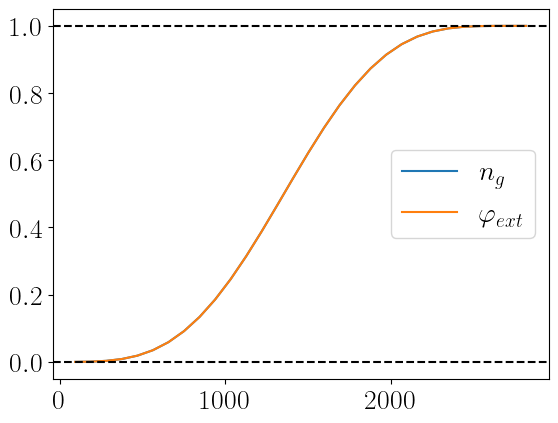

In [208]:
#Ovrlap2_GS_NG = np.array(Overlap2_GS_NG)
#np.save('T_EVOL_T5_5_INVGAP_Nt30_NG_M20N50_EG_1.npy', Ovrlap2_GS_NG)
#Ovrlap2_GS_PHIEXT= np.array(Overlap2_GS_PHIEXT)
#np.save('T_EVOL_T5_5_INVGAP_Nt30_PHIEXT_M20N50_EG_1.npy', Ovrlap2_GS_PHIEXT)

plt.plot(time_array,Overlap2_GS_NG,label=r"$n_g$")
plt.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\varphi_{ext}$")
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.legend()
#plt.savefig('T_EVOL_T5_5_INVGAP_Nt30_NG_PHIEXT_M20N50_EG_1.png',dpi=300,bbox_inches='tight')
plt.show()